# Modeling 

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

## Setting dataframes
- df_baseline is just numerical data
- just metadata dataframe (in the works)
- df_text is with vectorized description
    - this was already split into train and test sets in preprocessing
    - joined to df after splitting into train/test

In [2]:
# load in dataframe
df = pd.read_csv('csv_files/9_1_all_books_df.csv')

In [3]:
# this just includes pages and ratings along with the target of best seller or not
df_baseline = df[['rating', 'pages', 'best_seller']]

In [4]:
# this data is already split into the training set with a reset index
# so it will be concated with the df after spliting into train and test sets
df_text_X = pd.read_csv('csv_files/X_train_nlp.csv')
df_text_y= pd.read_csv('csv_files/y_train_nlp.csv', header=None)
df_text_X_test = pd.read_csv('csv_files/X_test_nlp.csv')
df_text_y_test = pd.read_csv('csv_files/y_test_nlp.csv', header=None)

In [5]:
# target names for all the models
target_names = ['Not Bestseller', 'Bestseller']

## Inspecting the data and splitting into train and test sets

In [6]:
df_text_X.tail()
# df_text_X.shape

,aaron,ab,abandon,abandonment,abby,abc,abduct,abducted,ability,able,...,zelda,zest,zeus,zillion,zimmer,zoe,zone,zoom,zorie,zoroastrian
1093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_text_y.tail()
# df_text_y.shape

,0
1093,1
1094,1
1095,1
1096,0
1097,1


In [8]:
df_text_X_test.head()
df_text_X_test.shape

(275, 5842)

In [9]:
df_text_y_test.head()
# df_text_y_test.shape
type(df_text_y_test)

# this is a series
type(df_text_y_test[0])

pandas.core.series.Series

In [10]:
df_text_y.columns

Int64Index([0], dtype='int64')

In [11]:
# look at dataframe
print(df_baseline.columns)
print(df_baseline.shape)
df_baseline.head()

Index(['rating', 'pages', 'best_seller'], dtype='object')
(1373, 3)


,rating,pages,best_seller
0,3.56,415,0
1,4.07,346,0
2,3.47,355,0
3,3.42,368,0
4,4.35,480,0


In [14]:
# split the dataset into training and validation datasets for just numerical data
X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(df_baseline[['rating', 'pages']], 
                                                                    df_baseline['best_seller'], 
                                                                    test_size = .2,
                                                                   random_state=42)

In [ ]:
# this actually doesn't need to happen... the text data is already split...
# split the dataset with nlp and other features
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[['rating', 'pages']], 
                                                                    df['best_seller'], 
                                                                    test_size = .2,
                                                                   random_state=42)

In [15]:
df_text = df_text_X 

In [16]:
df_text['_target'] = df_text_y[0]

In [17]:
df_text['_target'].dtype

dtype('int64')

In [18]:
df_text.head()

,aaron,ab,abandon,abandonment,abby,abc,abduct,abducted,ability,able,...,zest,zeus,zillion,zimmer,zoe,zone,zoom,zorie,zoroastrian,_target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# deep vs shallow copies
df_text_X = df_text_X.loc[:, df_text_X.columns != '_target']

In [20]:
y_train_rating.tail()

1095    1
1130    1
1294    1
860     0
1126    1
Name: best_seller, dtype: int64

# Numerical Baseline model
- On numerical data only
- the first uses the `'stratified'` strategy to predict, the second uses the `'most_frequent'` strategy

In [21]:
base = DummyClassifier(strategy= 'stratified', random_state=42)

In [22]:
base.fit(X_train_rating, y_train_rating)

DummyClassifier(constant=None, random_state=42, strategy='stratified')

In [23]:
base_predictions = base.predict(X_test_rating)

In [24]:
# graph train confusion matrix
base_confusion = plot_confusion_matrix(base, X_train_rating, y_train_rating, 
                                        cmap='ocean', display_labels=target_names)
base_confusion

In [25]:
print('mean training accuracy' ,base.score(X_train_rating, y_train_rating))
print('mean test accuracy', base.score(X_test_rating, y_test_rating))
# mean training accuracy 0.663023679417122
# mean test accuracy 0.6654545454545454

mean training accuracy 0.663023679417122
mean test accuracy 0.6654545454545454


In [26]:
# baseline classification report
print(classification_report(y_test_rating, base_predictions, target_names=target_names))


                precision    recall  f1-score   support

Not Bestseller       0.78      0.78      0.78       213
    Bestseller       0.26      0.26      0.26        62

      accuracy                           0.67       275
     macro avg       0.52      0.52      0.52       275
  weighted avg       0.67      0.67      0.67       275



In [27]:
base_2 = DummyClassifier(strategy= 'most_frequent', random_state=42)

In [28]:
base_2.fit(X_train_rating, y_train_rating)

DummyClassifier(constant=None, random_state=42, strategy='most_frequent')

In [29]:
base_2_predictions = base_2.predict(X_test_rating)

In [30]:
print('mean training accuracy' ,base_2.score(X_train_rating, y_train_rating))
print('mean test accuracy', base_2.score(X_test_rating, y_test_rating))
# mean training accuracy 0.7932604735883424
# mean test accuracy 0.7745454545454545

mean training accuracy 0.7932604735883424
mean test accuracy 0.7745454545454545


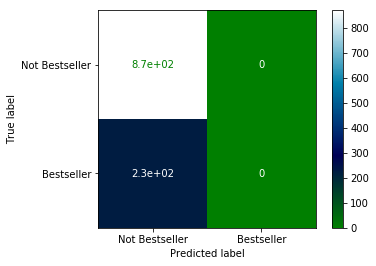

In [31]:
# graph train confusion matrix
base_2_confusion = plot_confusion_matrix(base_2, X_train_rating, y_train_rating, 
                                        cmap='ocean', display_labels=target_names)
base_2_confusion

In [32]:
# baseline 2 classification report for test set
print(classification_report(y_test_rating,base_2_predictions, target_names=target_names))

                precision    recall  f1-score   support

Not Bestseller       0.77      1.00      0.87       213
    Bestseller       0.00      0.00      0.00        62

      accuracy                           0.77       275
     macro avg       0.39      0.50      0.44       275
  weighted avg       0.60      0.77      0.68       275



/Users/roberthillery/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Tree based Modeling

## Numerical Random Forest

In [33]:
rf = RandomForestClassifier()

In [34]:
# use X_train_rating, y_train_rating for numerical models
rf.fit(X_train_rating, y_train_rating)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Testing set for Numerical Random Forest

In [35]:
rf_predictions = rf.predict(X_test_rating)

In [36]:
confusion_matrix(y_test_rating, rf_predictions)

array([[197,  16],
       [ 43,  19]])

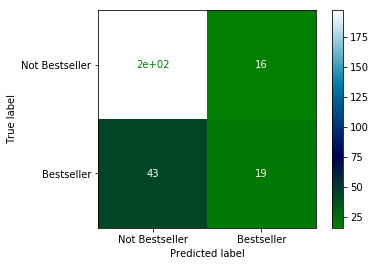

In [37]:
# graph testing confusion matrix
rf_confusion = plot_confusion_matrix(rf, X_test_rating, y_test_rating, 
                                        cmap='ocean', display_labels=target_names)
rf_confusion

In [38]:
rf.score(X_test_rating, y_test_rating)

0.7854545454545454

In [39]:
# classification report for testing set 
print(classification_report(y_test_rating, rf_predictions, target_names=target_names))

                precision    recall  f1-score   support

Not Bestseller       0.82      0.92      0.87       213
    Bestseller       0.54      0.31      0.39        62

      accuracy                           0.79       275
     macro avg       0.68      0.62      0.63       275
  weighted avg       0.76      0.79      0.76       275



In [40]:
rf.decision_path(X_train_rating)

(<1098x44868 sparse matrix of type '<class 'numpy.int64'>'
 	with 1412055 stored elements in Compressed Sparse Row format>,
 array([    0,   443,   894,  1339,  1812,  2307,  2800,  3287,  3756,
         4183,  4630,  5093,  5536,  5965,  6426,  6873,  7300,  7775,
         8276,  8721,  9158,  9545, 10016, 10431, 10926, 11419, 11856,
        12295, 12702, 13161, 13620, 14049, 14494, 14957, 15458, 15871,
        16300, 16761, 17218, 17657, 18136, 18583, 19060, 19511, 19992,
        20429, 20912, 21377, 21814, 22249, 22680, 23063, 23442, 23883,
        24342, 24789, 25230, 25675, 26136, 26565, 26984, 27411, 27816,
        28273, 28762, 29233, 29660, 30053, 30518, 30949, 31408, 31837,
        32268, 32739, 33210, 33653, 34096, 34529, 34998, 35449, 35904,
        36277, 36760, 37241, 37708, 38167, 38614, 39097, 39548, 40005,
        40416, 40873, 41334, 41785, 42192, 42653, 43090, 43509, 43948,
        44403, 44868]))

In [41]:
rf.decision_path(X_test_rating)

(<275x44868 sparse matrix of type '<class 'numpy.int64'>'
 	with 350198 stored elements in Compressed Sparse Row format>,
 array([    0,   443,   894,  1339,  1812,  2307,  2800,  3287,  3756,
         4183,  4630,  5093,  5536,  5965,  6426,  6873,  7300,  7775,
         8276,  8721,  9158,  9545, 10016, 10431, 10926, 11419, 11856,
        12295, 12702, 13161, 13620, 14049, 14494, 14957, 15458, 15871,
        16300, 16761, 17218, 17657, 18136, 18583, 19060, 19511, 19992,
        20429, 20912, 21377, 21814, 22249, 22680, 23063, 23442, 23883,
        24342, 24789, 25230, 25675, 26136, 26565, 26984, 27411, 27816,
        28273, 28762, 29233, 29660, 30053, 30518, 30949, 31408, 31837,
        32268, 32739, 33210, 33653, 34096, 34529, 34998, 35449, 35904,
        36277, 36760, 37241, 37708, 38167, 38614, 39097, 39548, 40005,
        40416, 40873, 41334, 41785, 42192, 42653, 43090, 43509, 43948,
        44403, 44868]))

In [42]:
rf.feature_importances_

array([0.4868532, 0.5131468])

## Text Modeling Random Forest
- only using text features

In [43]:
rf_text = RandomForestClassifier()

In [44]:
# use df_text_X, df_text_y[0] for text models
rf_text.fit(df_text_X, df_text_y[0])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### start exploring the rf model

In [45]:
# look at what features are important...
rf_text.feature_importances_
len(rf_text.feature_importances_)

5842

In [46]:
max(rf_text.feature_importances_)

0.011216354276453021

In [47]:
# random_forest_text.feature_importances_.where(max(random_forest_text.feature_importances_))
np.where(rf_text.feature_importances_ == max(rf_text.feature_importances_))
# this is 'prize'... maybe a little to telling

(array([4091]),)

In [48]:
rf_text.feature_importances_[4091]

0.011216354276453021

In [49]:
# name of column
print(df_text_X.columns[4091])
# amount of times word appears
df_text_X.iloc[:,4091].sum()
# this is a word to remove...

prize


23

### end exploring the rf model

In [50]:
rf_train_text_predictions = rf_text.predict(df_text_X)

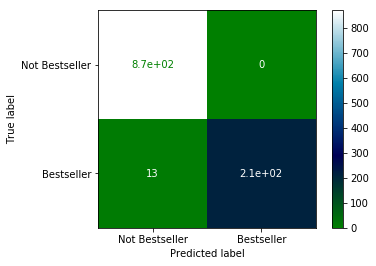

In [51]:
# graph train confusion matrix
rf_text_confusion = plot_confusion_matrix(rf_text, df_text_X, df_text_y[0], 
                                        cmap='ocean', display_labels=target_names)
rf_text_confusion

In [52]:
# look at accuracy for training set
rf_text.score(df_text_X, df_text_y[0])

0.98816029143898

In [53]:
# classification report for testing set 
print(classification_report(df_text_y[0], rf_train_text_predictions, target_names=target_names))

                precision    recall  f1-score   support

Not Bestseller       0.99      1.00      0.99       871
    Bestseller       1.00      0.94      0.97       227

      accuracy                           0.99      1098
     macro avg       0.99      0.97      0.98      1098
  weighted avg       0.99      0.99      0.99      1098



#### Testing set for Text Modeling Random Forest

In [54]:
rf_text_predictions = rf_text.predict(df_text_X_test)

In [55]:
confusion_matrix(df_text_y_test[0], rf_text_predictions)

array([[209,   4],
       [ 48,  14]])

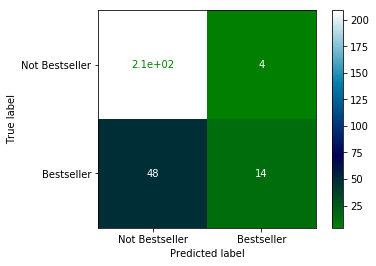

In [56]:
# graph testing confusion matrix
rf_text_test_confusion = plot_confusion_matrix(rf_text, df_text_X_test, df_text_y_test[0], 
                                        cmap='ocean', display_labels=target_names)
rf_text_test_confusion

In [57]:
# look at accuracy for test set
rf_text.score(df_text_X_test, df_text_y_test)

0.8109090909090909

In [58]:
# classification report for testing set 
print(classification_report(df_text_y_test[0], rf_text_predictions, target_names=target_names))

                precision    recall  f1-score   support

Not Bestseller       0.81      0.98      0.89       213
    Bestseller       0.78      0.23      0.35        62

      accuracy                           0.81       275
     macro avg       0.80      0.60      0.62       275
  weighted avg       0.81      0.81      0.77       275



Initially, the text model performs marginally better (> .1) on the test set that the meta data model, as seen in the subset accuracy for both models.

# Logistic Regression

## Numerical Logistic Regression

In [59]:
log  = LogisticRegression()

In [60]:
# use X_train_rating, y_train_rating for numerical models
log.fit(X_train_rating, y_train_rating)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
log_predictions_training = log.predict(X_train_rating)

In [62]:
confusion_matrix(y_train_rating, log_predictions_training)

array([[862,   9],
       [202,  25]])

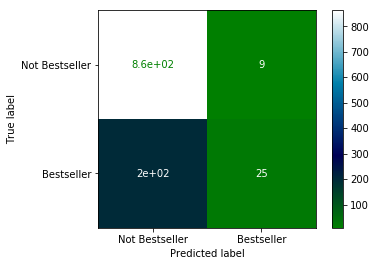

In [63]:
# graph testing confusion matrix
log_train_confusion = plot_confusion_matrix(log, X_train_rating, y_train_rating, 
                                        cmap='ocean', display_labels=target_names)
log_train_confusion

In [64]:
log.score(X_train_rating, y_train_rating)

0.807832422586521

In [65]:
# classification report for training set 
print(classification_report(y_train_rating, log_predictions_training, target_names=target_names))

                precision    recall  f1-score   support

Not Bestseller       0.81      0.99      0.89       871
    Bestseller       0.74      0.11      0.19       227

      accuracy                           0.81      1098
     macro avg       0.77      0.55      0.54      1098
  weighted avg       0.79      0.81      0.75      1098



#### Testing set for Numerical Logistic Regression

In [66]:
log_predictions = log.predict(X_test_rating)

In [67]:
confusion_matrix(y_test_rating,log_predictions)

array([[212,   1],
       [ 56,   6]])

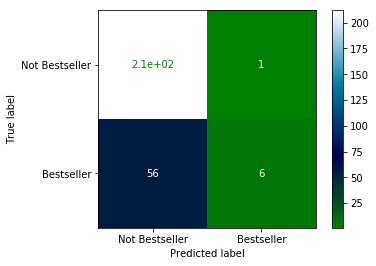

In [68]:
# graph testing confusion matrix
log_confusion = plot_confusion_matrix(log, X_test_rating, y_test_rating, 
                                        cmap='ocean', display_labels=target_names)
log_confusion

In [69]:
log.score(X_test_rating,y_test_rating)

0.7927272727272727

In [70]:
# classification report for testing set 
print(classification_report(y_test_rating,log_predictions, target_names=target_names))

                precision    recall  f1-score   support

Not Bestseller       0.79      1.00      0.88       213
    Bestseller       0.86      0.10      0.17        62

      accuracy                           0.79       275
     macro avg       0.82      0.55      0.53       275
  weighted avg       0.81      0.79      0.72       275



- The initial logistic model predicts the major class 98% of the time. 
- Will look optimizing for specificity by inspecting the true negative instances.




### Cross Validated  Numerical Logistic

## Text Modeling Logistic Regression

In [71]:
log_text = LogisticRegression()

In [72]:
# use df_text_X, df_text_y[0] for text models
log_text.fit(df_text_X, df_text_y[0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
log_predictions_text_training = log_text.predict(df_text_X)

In [74]:
confusion_matrix(df_text_y[0], log_predictions_text_training)

array([[871,   0],
       [ 38, 189]])

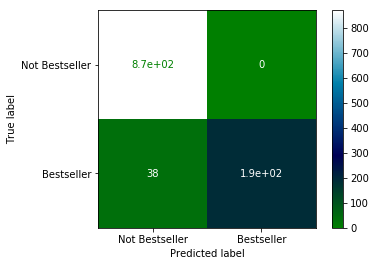

In [75]:
# graph training confusion matrix
log_text_confusion = plot_confusion_matrix(log_text, df_text_X, df_text_y[0], 
                                        cmap='ocean', display_labels=target_names)
log_text_confusion

In [76]:
log_text.score(df_text_X, df_text_y[0])

0.9653916211293261

In [77]:
# classification report for training set 
print(classification_report(df_text_y[0], log_predictions_text_training, target_names=target_names))

                precision    recall  f1-score   support

Not Bestseller       0.96      1.00      0.98       871
    Bestseller       1.00      0.83      0.91       227

      accuracy                           0.97      1098
     macro avg       0.98      0.92      0.94      1098
  weighted avg       0.97      0.97      0.96      1098



Text features perform better than numerical features wrt to accuracy for logistic regression baseline models.

#### Testing set for Text Modeling Logistic Regression

### Cross Validated Text Modeling Logistic

# things to do
- find most important features....
- word counts...
- look at correctly predicted minority classes in baseline models
- optimize 
- pipeline
- add voting classifier `from sklearn.ensemble import VotingClassifier`


In [78]:
import sklearn

In [79]:
sklearn.__version__

'0.22.1'

In [1]:
from modeling import baseline_modeling

In [85]:
log_text2 = LogisticRegression()
rf2 = RandomForestClassifier()

0.9653916211293261

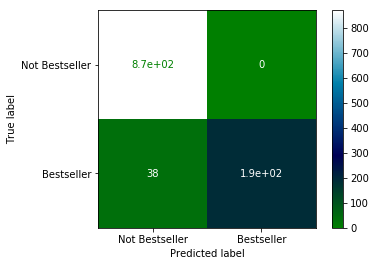

In [86]:
baseline_modeling(log_text2, df_text_X, df_text_y[0])

0.982695810564663

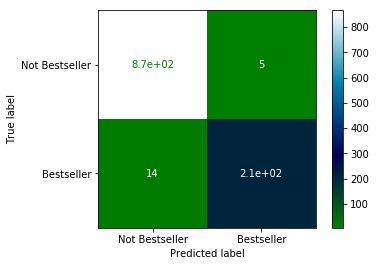

In [87]:
baseline_modeling(rf2, X_train_rating, y_train_rating)